### 專案名稱: 第四屆機器學習百日馬拉松
### 功能描述: 第9天作業
### 版權所有: Dunk  
### 程式撰寫: Dunk  
### 撰寫日期：2020/03/04
### 改版日期:  
### 改版備註:

# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

# [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

### ANS:

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

float64    65
int64      41
object     16
dtype: int64
'----------------------------'
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAR

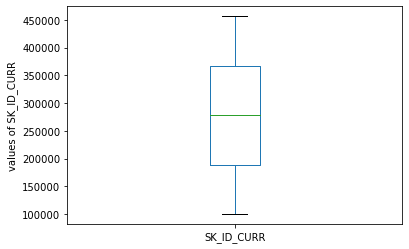

'column[CNT_CHILDREN]s value is from 19 to 0'


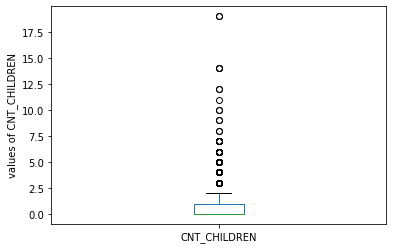

'column[AMT_INCOME_TOTAL]s value is from 117000000.0 to 25650.0'


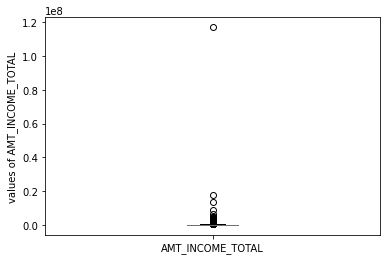

'column[AMT_CREDIT]s value is from 4050000.0 to 45000.0'


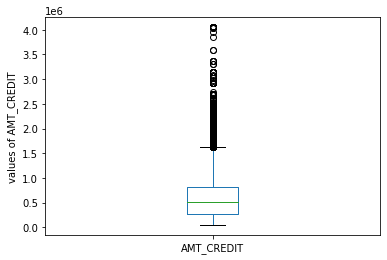

'column[AMT_ANNUITY]s value is from 258025.5 to 1615.5'


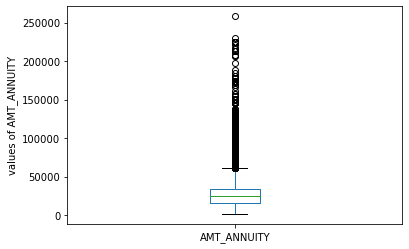

'column[AMT_GOODS_PRICE]s value is from 4050000.0 to 40500.0'


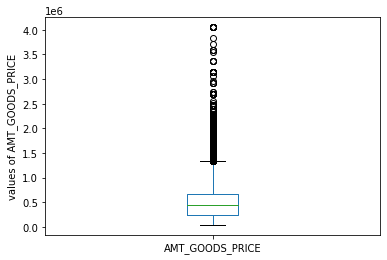

'column[REGION_POPULATION_RELATIVE]s value is from 0.072508 to 0.00029'


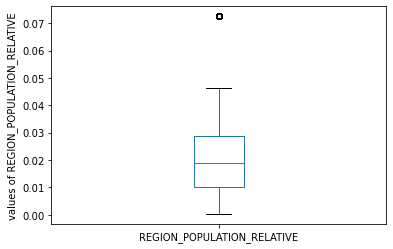

'column[DAYS_BIRTH]s value is from -7489 to -25229'


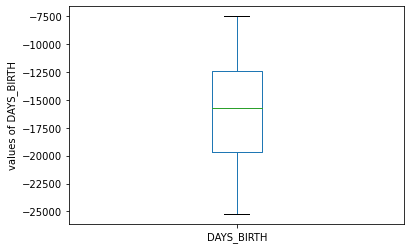

'column[DAYS_EMPLOYED]s value is from 365243 to -17912'


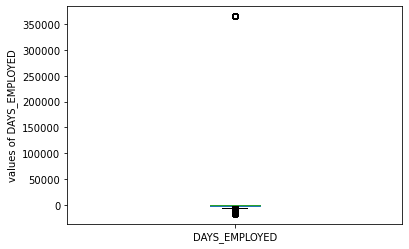

'column[DAYS_REGISTRATION]s value is from 0.0 to -24672.0'


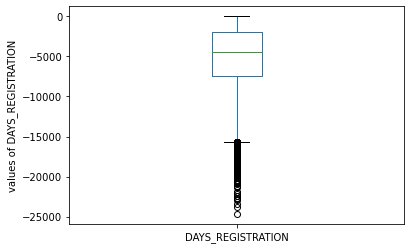

'column[DAYS_ID_PUBLISH]s value is from 0 to -7197'


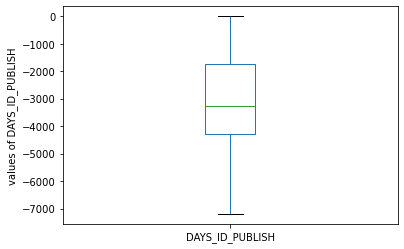

'column[OWN_CAR_AGE]s value is from 91.0 to 0.0'


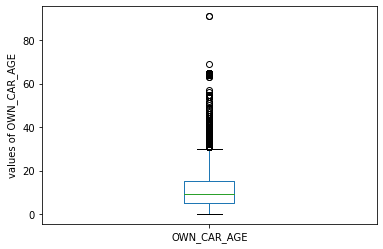

'column[CNT_FAM_MEMBERS]s value is from 20.0 to 1.0'


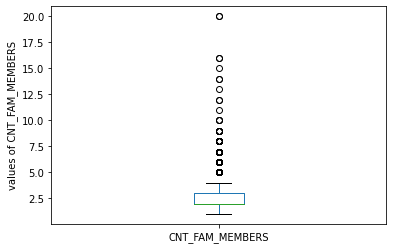

'column[REGION_RATING_CLIENT]s value is from 3 to 1'


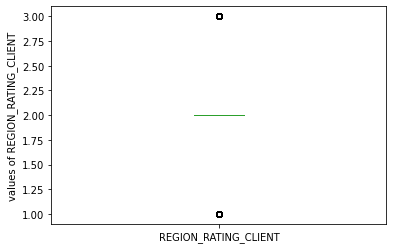

'column[REGION_RATING_CLIENT_W_CITY]s value is from 3 to 1'


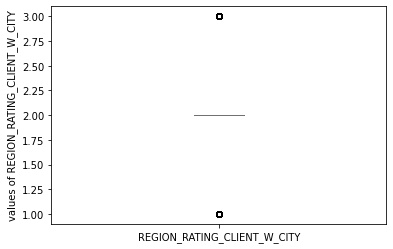

'column[HOUR_APPR_PROCESS_START]s value is from 23 to 0'


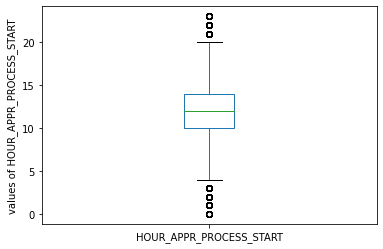

'column[EXT_SOURCE_1]s value is from 0.962692770561306 to 0.014568132412445587'


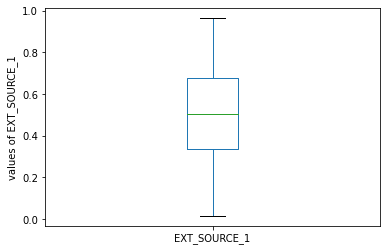

('column[EXT_SOURCE_2]s value is from 0.8549996664047012 to '
 '8.173616518884397e-08')


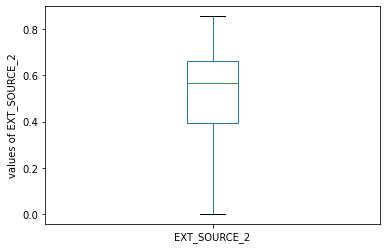

('column[EXT_SOURCE_3]s value is from 0.8960095494948396 to '
 '0.0005272652387098817')


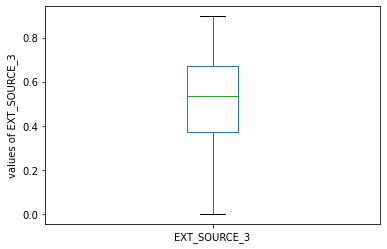

'column[APARTMENTS_AVG]s value is from 1.0 to 0.0'


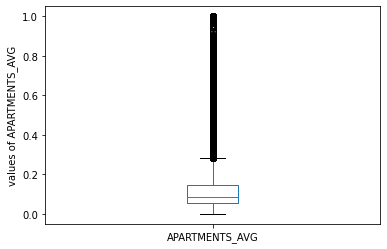

'column[BASEMENTAREA_AVG]s value is from 1.0 to 0.0'


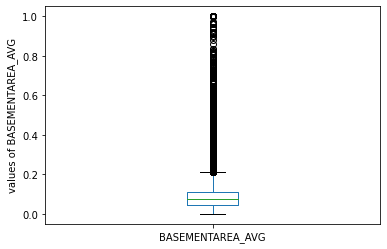

'column[YEARS_BEGINEXPLUATATION_AVG]s value is from 1.0 to 0.0'


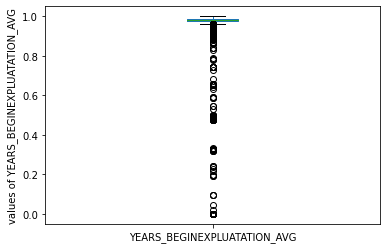

'column[YEARS_BUILD_AVG]s value is from 1.0 to 0.0'


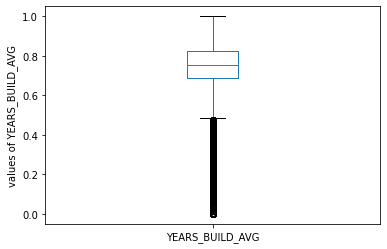

'column[COMMONAREA_AVG]s value is from 1.0 to 0.0'


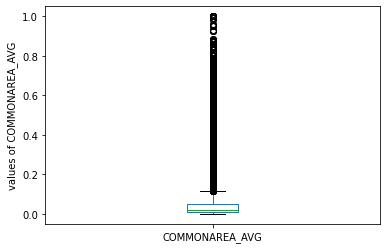

'column[ELEVATORS_AVG]s value is from 1.0 to 0.0'


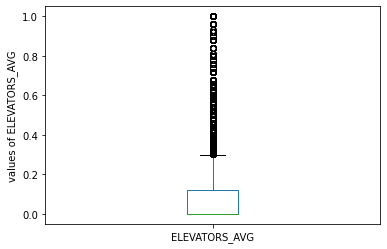

'column[ENTRANCES_AVG]s value is from 1.0 to 0.0'


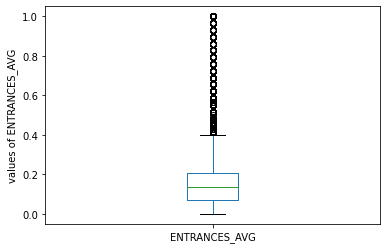

'column[FLOORSMAX_AVG]s value is from 1.0 to 0.0'


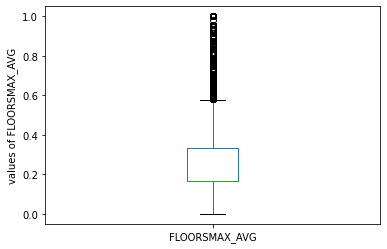

'column[FLOORSMIN_AVG]s value is from 1.0 to 0.0'


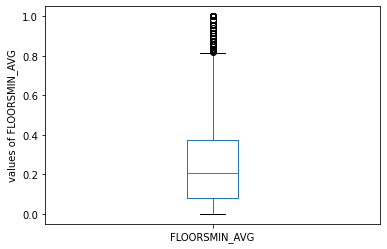

'column[LANDAREA_AVG]s value is from 1.0 to 0.0'


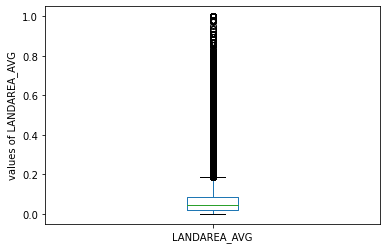

'column[LIVINGAPARTMENTS_AVG]s value is from 1.0 to 0.0'


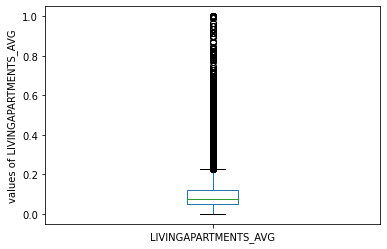

'column[LIVINGAREA_AVG]s value is from 1.0 to 0.0'


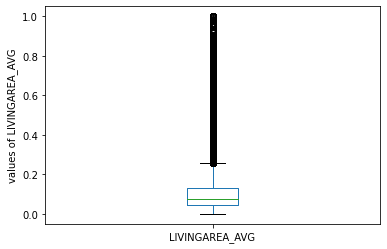

'column[NONLIVINGAPARTMENTS_AVG]s value is from 1.0 to 0.0'


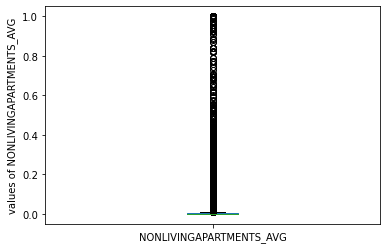

'column[NONLIVINGAREA_AVG]s value is from 1.0 to 0.0'


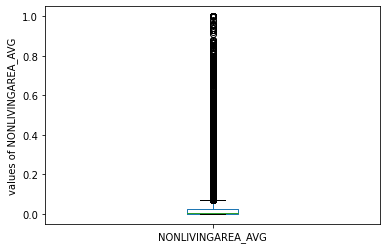

'column[APARTMENTS_MODE]s value is from 1.0 to 0.0'


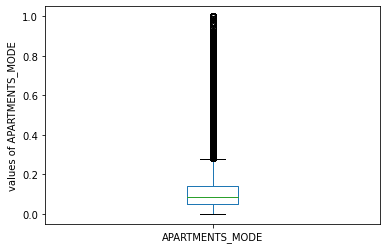

'column[BASEMENTAREA_MODE]s value is from 1.0 to 0.0'


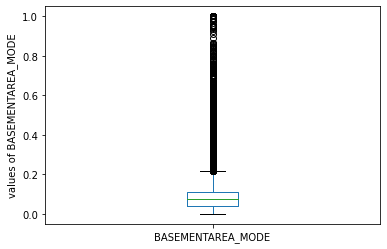

'column[YEARS_BEGINEXPLUATATION_MODE]s value is from 1.0 to 0.0'


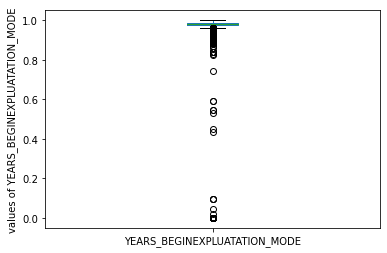

'column[YEARS_BUILD_MODE]s value is from 1.0 to 0.0'


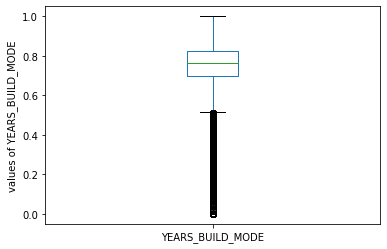

'column[COMMONAREA_MODE]s value is from 1.0 to 0.0'


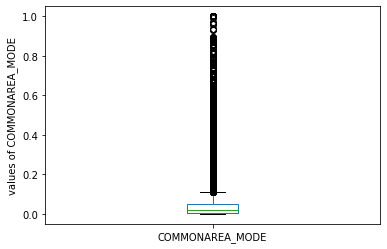

'column[ELEVATORS_MODE]s value is from 1.0 to 0.0'


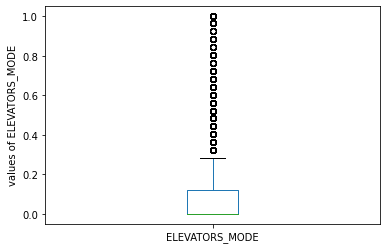

'column[ENTRANCES_MODE]s value is from 1.0 to 0.0'


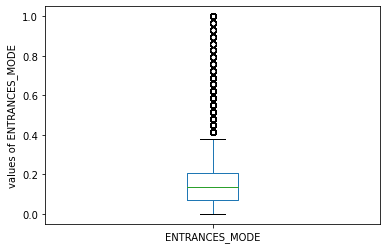

'column[FLOORSMAX_MODE]s value is from 1.0 to 0.0'


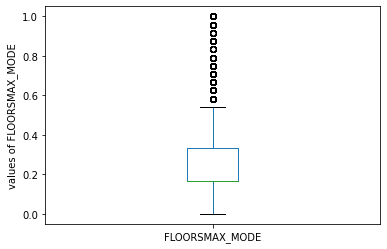

'column[FLOORSMIN_MODE]s value is from 1.0 to 0.0'


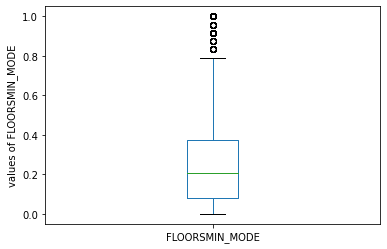

'column[LANDAREA_MODE]s value is from 1.0 to 0.0'


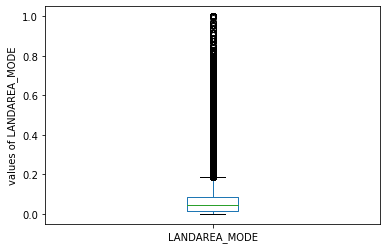

'column[LIVINGAPARTMENTS_MODE]s value is from 1.0 to 0.0'


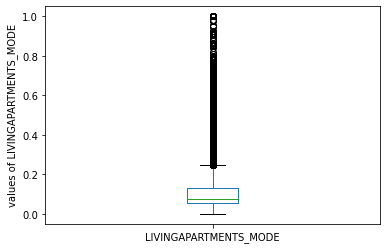

'column[LIVINGAREA_MODE]s value is from 1.0 to 0.0'


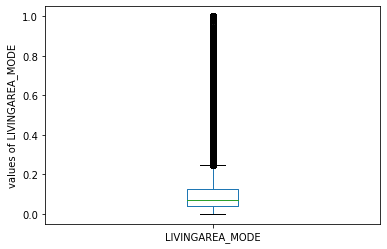

'column[NONLIVINGAPARTMENTS_MODE]s value is from 1.0 to 0.0'


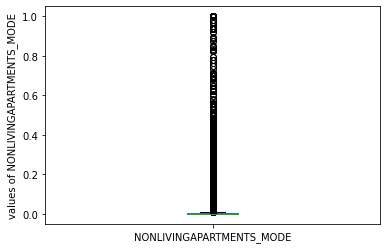

'column[NONLIVINGAREA_MODE]s value is from 1.0 to 0.0'


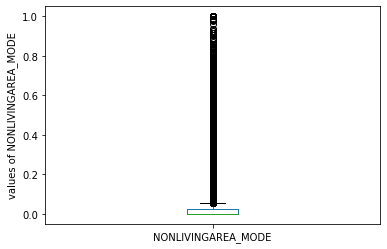

'column[APARTMENTS_MEDI]s value is from 1.0 to 0.0'


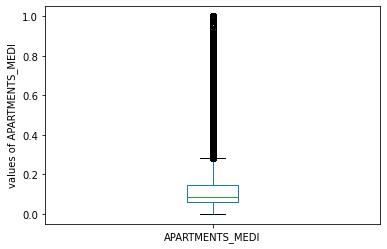

'column[BASEMENTAREA_MEDI]s value is from 1.0 to 0.0'


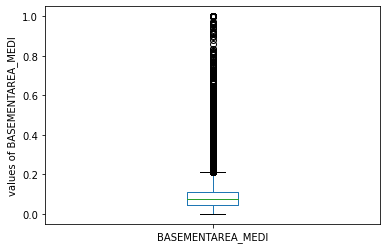

'column[YEARS_BEGINEXPLUATATION_MEDI]s value is from 1.0 to 0.0'


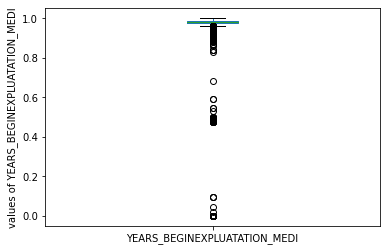

'column[YEARS_BUILD_MEDI]s value is from 1.0 to 0.0'


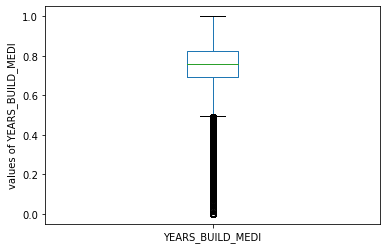

'column[COMMONAREA_MEDI]s value is from 1.0 to 0.0'


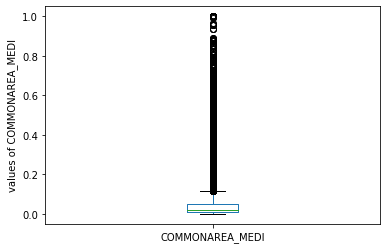

'column[ELEVATORS_MEDI]s value is from 1.0 to 0.0'


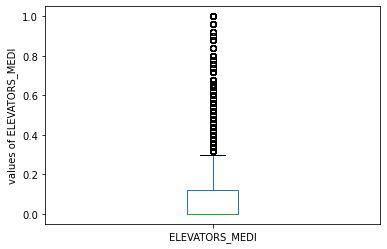

'column[ENTRANCES_MEDI]s value is from 1.0 to 0.0'


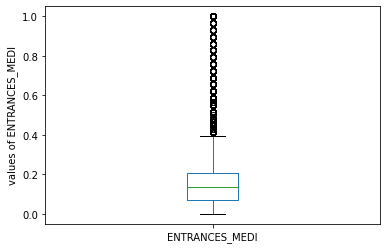

'column[FLOORSMAX_MEDI]s value is from 1.0 to 0.0'


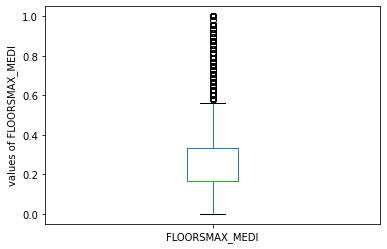

'column[FLOORSMIN_MEDI]s value is from 1.0 to 0.0'


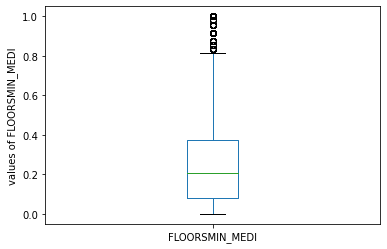

'column[LANDAREA_MEDI]s value is from 1.0 to 0.0'


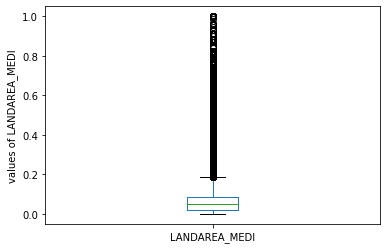

'column[LIVINGAPARTMENTS_MEDI]s value is from 1.0 to 0.0'


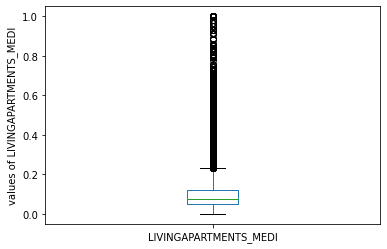

'column[LIVINGAREA_MEDI]s value is from 1.0 to 0.0'


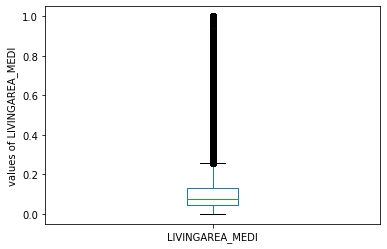

'column[NONLIVINGAPARTMENTS_MEDI]s value is from 1.0 to 0.0'


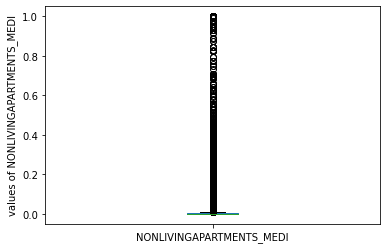

'column[NONLIVINGAREA_MEDI]s value is from 1.0 to 0.0'


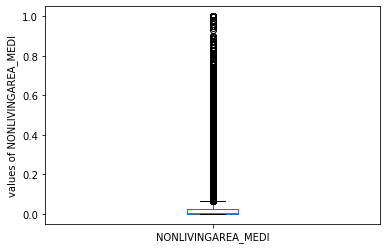

'column[TOTALAREA_MODE]s value is from 1.0 to 0.0'


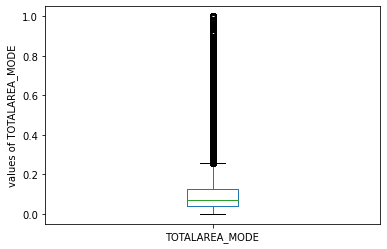

'column[OBS_30_CNT_SOCIAL_CIRCLE]s value is from 348.0 to 0.0'


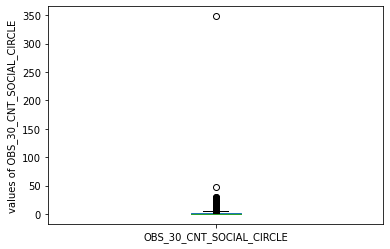

'column[DEF_30_CNT_SOCIAL_CIRCLE]s value is from 34.0 to 0.0'


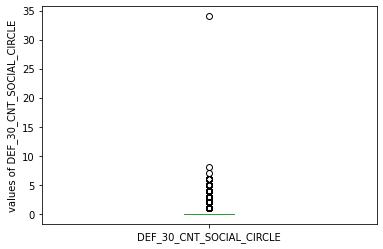

'column[OBS_60_CNT_SOCIAL_CIRCLE]s value is from 344.0 to 0.0'


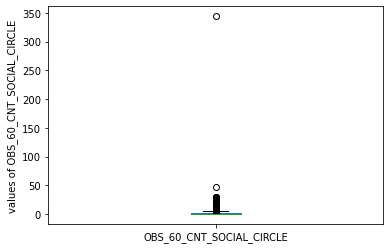

'column[DEF_60_CNT_SOCIAL_CIRCLE]s value is from 24.0 to 0.0'


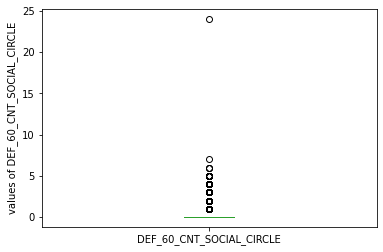

'column[DAYS_LAST_PHONE_CHANGE]s value is from 0.0 to -4292.0'


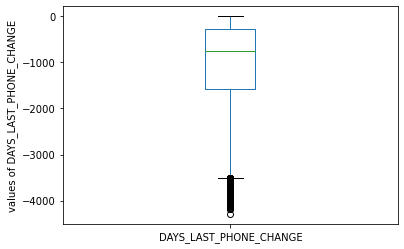

'column[AMT_REQ_CREDIT_BUREAU_HOUR]s value is from 4.0 to 0.0'


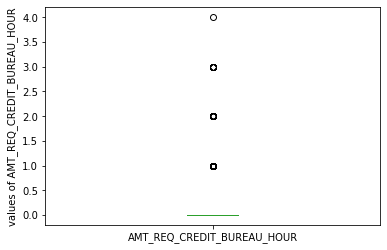

'column[AMT_REQ_CREDIT_BUREAU_DAY]s value is from 9.0 to 0.0'


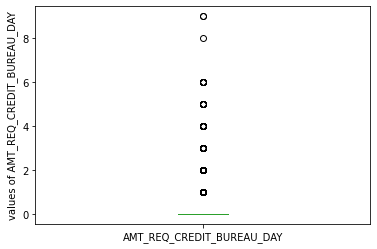

'column[AMT_REQ_CREDIT_BUREAU_WEEK]s value is from 8.0 to 0.0'


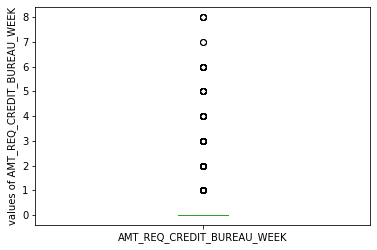

'column[AMT_REQ_CREDIT_BUREAU_MON]s value is from 27.0 to 0.0'


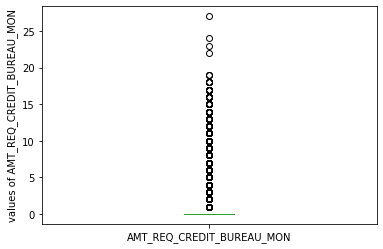

'column[AMT_REQ_CREDIT_BUREAU_QRT]s value is from 261.0 to 0.0'


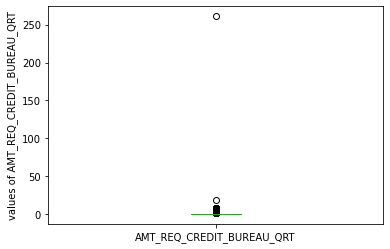

'column[AMT_REQ_CREDIT_BUREAU_YEAR]s value is from 25.0 to 0.0'


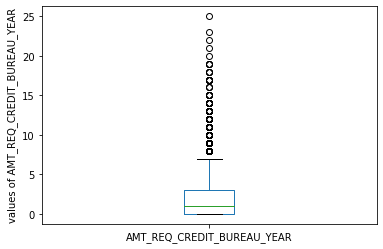

In [48]:
# 先篩選數值型的欄位
import pprint
#先列出有哪幾種資料型態
pprint.pprint(app_train.dtypes.value_counts())
pprint.pprint('----------------------------')
#選出float64及int64結果
dtype_select = [np.dtype('float64'),np.dtype('int64')]

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

print(numeric_columns)
pprint.pprint('----------------------------')
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print(numeric_columns)
pprint.pprint('----------------------------')
print("Numbers of remain columns {0}".format(len(numeric_columns)))

# 檢視這些欄位的數值範圍
# 參考網址
# https://www.itread01.com/content/1541665023.html
for col in numeric_columns:
    """
    建立箱型圖
    """
    pprint.pprint('column[{0}]''s value is from {1} to {2}'.format(col,app_train[col].max(),app_train[col].min()))
    
    fig,axes = plt.subplots()
    app_train[col].plot(kind='box',ax=axes)
    axes.set_ylabel('values of {0}'.format(col))
    plt.show()

In [ ]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

In [56]:
# 最大值離平均與中位數很遠
import statsmodels.api as sm
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
# 參考網址
# https://www.cnblogs.com/webRobot/p/11405526.html
cdf =  sm.distributions.ECDF(app_train['AMT_INCOME_TOTAL'])

print(cdf.max())

# plt.plot(list(cdf.index), cdf/cdf.max())
# plt.xlabel('Value')
# plt.ylabel('ECDF')
# plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
# plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

# plt.show()

# # 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
# plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
# plt.xlabel('Value (log-scale)')
# plt.ylabel('ECDF')

# plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

# plt.show()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


AttributeError: 'ECDF' object has no attribute 'max'

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

In [ ]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

In [ ]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here

cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()
"""
app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

In [ ]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = 
loc_b = 

app_train.loc[loc_a, loc_b].hist()
plt.show()